# LOGISTIC REGRESSION PROJECT (JOSE PORTILLA)

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## IMPORTS

**Import a few libraries you think you'll need**

In [2]:
import pandas as pd
import numpy as np

## GET THE DATA

**Read in the advertising.csv file and set it to a data frame called "df".**

In [3]:
df = pd.read_csv('advertising.csv')

**Check the head of "df", and check out its info() and describe() methods.**

In [4]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## EDA

**Let's explore the data!**

**Histogram of the Age**

In [7]:

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Age'>

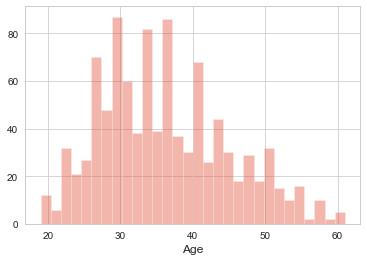

In [8]:
sns.distplot(df['Age'], bins=30, kde=False)

**Jointplot showing Area Income versus Age.**

In [9]:
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')

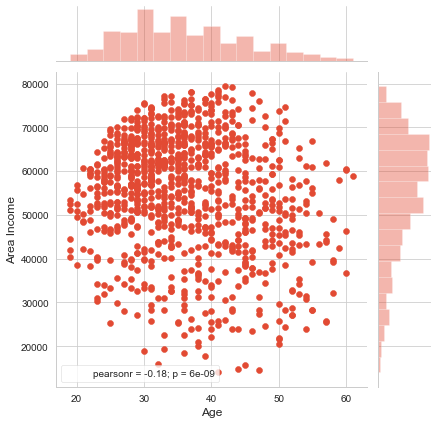

In [10]:
sns.jointplot(x='Age', y='Area Income', data=df).annotate(stats.pearsonr)

**Jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

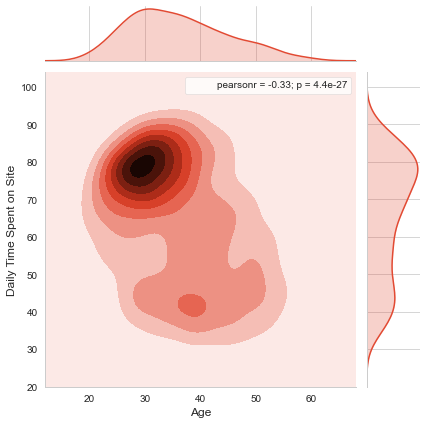

In [11]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=df, kind='kde').annotate(stats.pearsonr)

**Jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

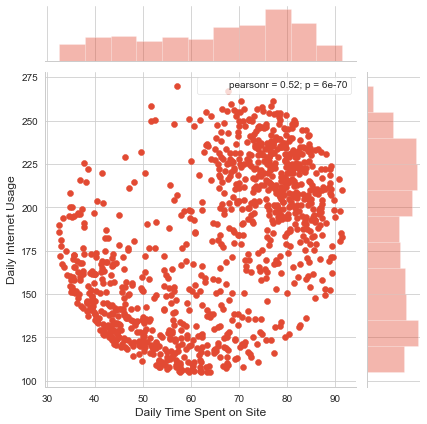

In [12]:
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=df).annotate(stats.pearsonr)

**Pairplot with the hue defined by the 'Clicked on Ad' column feature.**

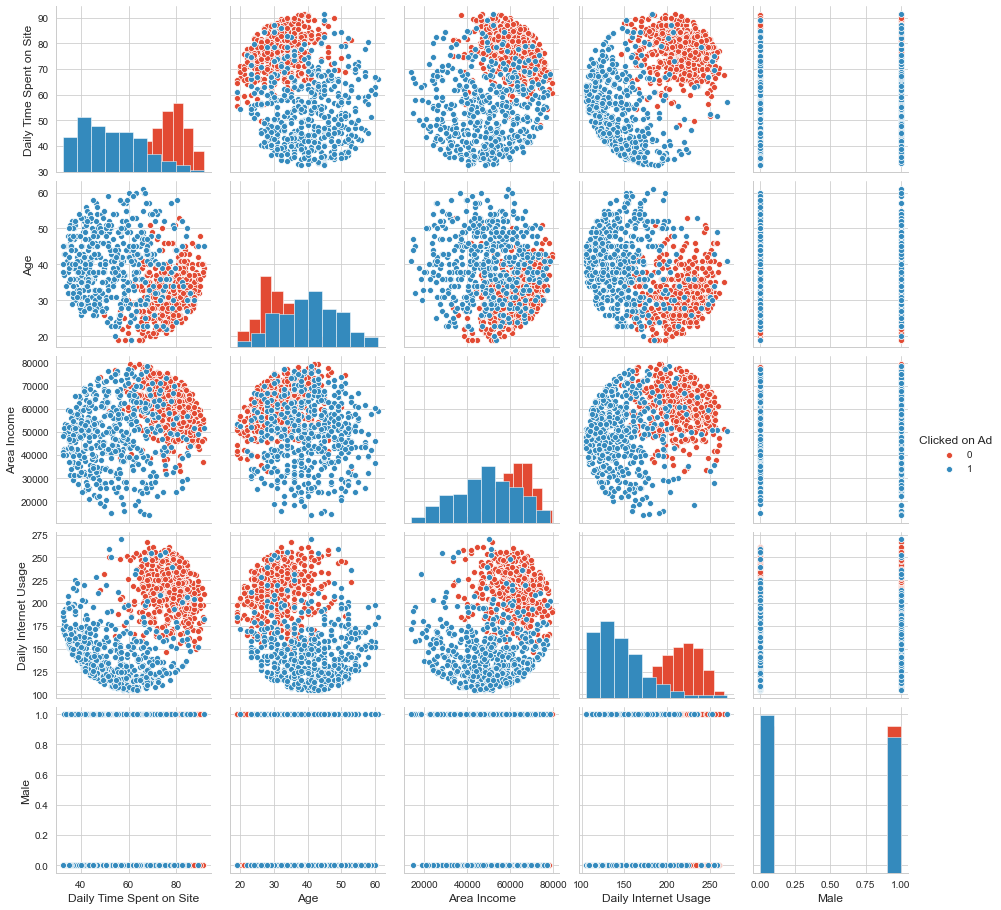

In [13]:
sns.pairplot(df, hue='Clicked on Ad', diag_kind='hist')

## LOGISTIC REGRESSION

**Split the data into training set and testing set using train_test_split**

In [15]:
df.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


In [16]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [17]:
X=df.drop(['Ad Topic Line','City', 'Country','Timestamp', 'Clicked on Ad'], axis=1)
y=df['Clicked on Ad']

In [18]:
X.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0
5,59.99,23,59761.56,226.74,1
6,88.91,33,53852.85,208.36,0
7,66.00,48,24593.33,131.76,1
8,74.53,30,68862.00,221.51,1
9,69.88,20,55642.32,183.82,1


In [19]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    0
9    0
Name: Clicked on Ad, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [24]:
X_train.shape

(750, 5)

In [25]:
X_test.shape

(250, 5)

## TRAINING AND FITTING

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logmodel = LogisticRegression()

In [29]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## PREDICTION TEST DATA

In [30]:
predictions = logmodel.predict(X_test)

**Classification report for the model.**

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       120
           1       0.97      0.81      0.88       130

    accuracy                           0.89       250
   macro avg       0.90      0.89      0.89       250
weighted avg       0.90      0.89      0.89       250



**Confusion matrix**

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(y_test, predictions)

array([[117,   3],
       [ 25, 105]], dtype=int64)

**This notebook is part of "Python for Data Science and Machine Learning Bootcamp" Udemy Course by Jose Portilla**